<a href="https://colab.research.google.com/github/YshGupta/CV_Assignment_1/blob/main/Que3_EE511_B21147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import struct
import csv
import matplotlib.pyplot as plt

In [52]:
#copied this function from internet to read the dataset and convert it into array of 2d arrays representing the pixel values in x and y
def read_idx_file(file_path):
    with open(file_path, 'rb') as f:
        magic_number = struct.unpack('>I', f.read(4))[0]
        num_items = struct.unpack('>I', f.read(4))[0]
        if magic_number == 2051:  # Image file
            num_rows = struct.unpack('>I', f.read(4))[0]
            num_cols = struct.unpack('>I', f.read(4))[0]
            data = f.read(int(num_items / 5) * num_rows * num_cols)
            # print("total number of images = " , int(num_items /5 ))
            return np.frombuffer(data, dtype=np.uint8).reshape(int(num_items/5), num_rows, num_cols)
        elif magic_number == 2049:  # Label file
            data = f.read(int(num_items / 5))
            return np.frombuffer(data, dtype=np.uint8)
        else:
            raise ValueError("Invalid magic number")

def image_to_histogram(image):

  histogram = [0]*256

  for pixel in image.flatten():
      histogram[pixel] += 1
  return histogram

def save_histograms_to_csv(histograms, labels, file_path):
    with open(file_path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Label'] + [f'Bin {i}' for i in range(256)])
        for histogram, label in zip(histograms, labels):
            writer.writerow([label] + list(histogram))


In [53]:
# File paths
train_image_file = 'train-images-idx3-ubyte'
train_label_file = 'train-labels-idx1-ubyte'
test_image_file = 't10k-images-idx3-ubyte'
test_label_file = 't10k-labels-idx1-ubyte'

# Read train dataset
train_images = read_idx_file(train_image_file)
train_labels = read_idx_file(train_label_file)

#read test dataset
test_images = read_idx_file(test_image_file)
test_labels = read_idx_file(test_label_file)

# train_labels.size

In [54]:
# Convert train images to histograms
train_histograms = [image_to_histogram(image) for image in train_images]
test_histograms = [image_to_histogram(image) for image in test_images]

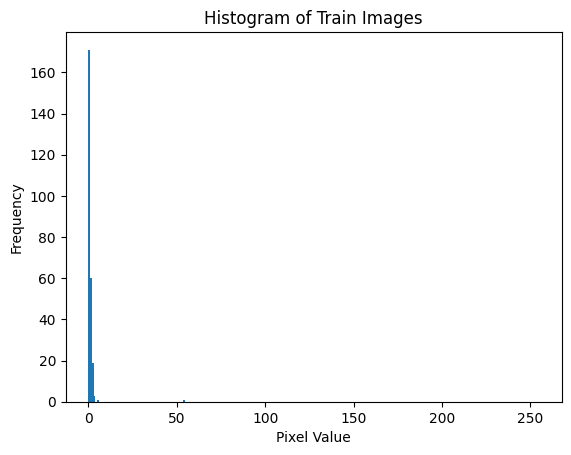

[618, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 2, 0, 5, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 54, 0, 1]


In [55]:
# Plot histogram
plt.hist(train_histograms[0], bins=256, range=(0, 255))
plt.title("Histogram of Train Images")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# Print array values
print(train_histograms[0])


In [56]:
# Save train histograms to CSV
save_histograms_to_csv(train_histograms, train_labels, 'train.csv')
save_histograms_to_csv(test_histograms , test_labels , 'test.csv')


In [57]:
rows , pixels_x , pixels_y = train_images.shape
#doing the min max normalization to train data with min as 0 and max as 255 , so each value = value / 255
normalised_train_images = train_images/ 255

print(train_images[0])
print(normalised_train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [58]:
#min max normalization to test data
normalised_test_images = test_images / 255


In [106]:
normalised_train_images_flattened = [ image.flatten() for image in normalised_train_images ]
# print(normalised_train_images_flattened[0])
normalised_train_images_flattened = np.array(normalised_train_images_flattened)

normalised_test_images_flattened = [image.flatten() for image in normalised_test_images]
normalised_test_images_flattened = np.array(normalised_test_images_flattened)

In [60]:
from sklearn.manifold import TSNE

In [61]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(normalised_train_images_flattened)


<ipython-input-127-1dc2682ed41c>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= train_labels, cmap=plt.cm.get_cmap("tab10", 10), marker="^", s=8)


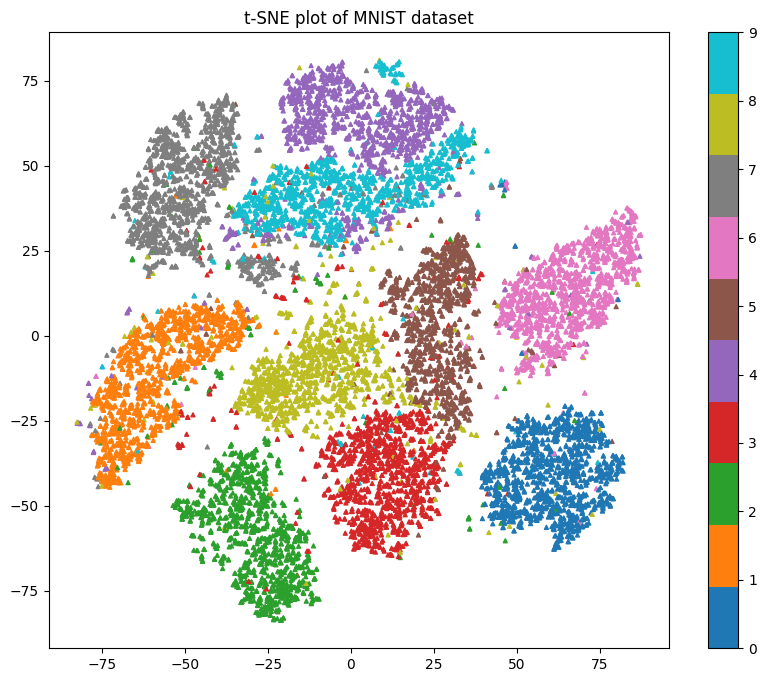

In [127]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= train_labels, cmap=plt.cm.get_cmap("tab10", 10), marker="^", s=8)
plt.colorbar(ticks=range(10))
plt.title("t-SNE plot of MNIST dataset")
plt.show()

In [98]:
import numpy as np
train_data = np.genfromtxt('train.csv' , delimiter = ',' , dtype =  np.float64 , skip_header = 1);

In [100]:
print(train_data[0])

[  5. 618.   2.   3.   1.   0.   0.   0.   0.   0.   1.   0.   3.   0.
   0.   1.   0.   2.   0.   5.   0.   0.   0.   0.   1.   1.   1.   1.
   1.   0.   0.   1.   0.   0.   0.   0.   1.   1.   0.   0.   2.   0.
   0.   0.   1.   0.   1.   1.   0.   0.   1.   0.   0.   0.   0.   0.
   1.   1.   0.   0.   0.   0.   0.   0.   0.   2.   0.   1.   0.   0.
   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.   2.   2.   2.
   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   2.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   1.   1.   0.   0.   1.   0.   1.   1.   0.   1.   2.   0.   0.
   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.
   0.   3.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   1.   1.   2.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   2.   1.   0.   0.   1.   1.   0.   0.   2.   0.   0.   0.   0.
   2. 

In [111]:
#now we have the dataset

#creating a mask for selectin two classes from the training images
labels = train_data[: , 0]
mask = np.logical_or(labels == 0 , labels == 1)
train_images_subset = train_data[mask]

train_images_subset.shape


(2557, 257)

In [124]:
test_data = np.genfromtxt('test.csv' , delimiter = ',' , dtype = np.float64 , skip_header = 1);

In [118]:
def LSM(train_data , test_data):

  train_data = np.concatenate((np.ones((train_data.shape[0], 1), dtype=np.float64), train_data), axis=1)
  test_data = np.concatenate((np.ones((test_data.shape[0], 1), dtype=np.float64), test_data), axis=1)


  # Separating the label from the training data
  X_train = (train_data[:, 1:])
  y_train = (train_data[:, 0])

  # Separating the label from the testing data
  X_test = (test_data[:, 1:])
  y_test = (test_data[:, 0])
  w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

  # Evaluating the model on the training data
  y_train_pred = X_train @ w
  mse_train = np.mean((y_train_pred - y_train) ** 2)

  # Evaluating the model on the testing data
  y_test_pred = X_test @ w
  mse_test = np.mean((y_test_pred - y_test) ** 2)
  print("Training MSE:", mse_train)
  print("Testing MSE:", mse_test)

In [125]:
#evaluation on two classes with labels as 0 and 1 only , but testing data may conatain any label
LSM(train_images_subset , test_data)

Training MSE: 2.731335434607022e-26
Testing MSE: 1.9488511357833656e-25


In [126]:
#evaluation on all classes
LSM(train_data , test_data)

Training MSE: 9.626532498009855e-27
Testing MSE: 8.95722941949122e-27
